In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
# Define the paths to your image and csv folders
train_val_dir = "/content/drive/MyDrive/charts/train_val"
test_dir = "/content/drive/MyDrive/charts/test"
train_path_labels = "/content/drive/MyDrive/charts/train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)



Loading of train images into numpy array

In [ ]:

# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
 if filename.endswith('.png'):
 # Load the images and resize them to (128, 128) with 3 color channels
    img = cv2.imread(os.path.join(train_val_dir, filename))
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # img = Image.open(os.path.join(train_val_dir, filename))
    img_array = np.array(img)
    # Append the array to the list of images
    images.append(img_array)
    labels.append(filename)
 
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy') 
y_train = np.load('y_train.npy') 

x_train.shape
x_train[:5]

y_train[:5]


array([13,  7, 15, 25, 27])

Loading of test images into numpy array

In [ ]:

# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
 if filename.endswith('.png'):
 # Load the images and resize them to (128, 128) with 3 color channels
    img = cv2.imread(os.path.join(test_dir, filename))
    img = cv2.resize(img, (128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # img = Image.open(os.path.join(test_dir, filename))
    img_array = np.array(img)
    # Append the array to the list of images
    images.append(img_array)
    labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy') 
y_test = np.load('y_test.npy') 

x_test.shape


(50, 128, 128, 3)

converting string labels into int

In [ ]:
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

images = np.array(images)
labels = np.array(labels)

Assigning the integer to the diffrent type labels

In [ ]:
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])


Normalizeinz the x_train and x_test

In [ ]:
x_train=x_train /255
x_test=x_train /255


initilize the values 

In [ ]:
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']

SPLITING THE DATA into test and train

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Implementation of CNN Model

In [ ]:

cnn_model = Sequential([
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)), 
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

COmplieing and traing the model

In [ ]:

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))


Epoch 1/50
1/1 [==============================] - 23s 23s/step - loss: 1.6122 - accuracy: 0.1538 - val_loss: 1.6687 - val_accuracy: 0.1650
Epoch 2/50
1/1 [==============================] - 27s 27s/step - loss: 1.6254 - accuracy: 0.2087 - val_loss: 1.5782 - val_accuracy: 0.3550
Epoch 3/50
1/1 [==============================] - 17s 17s/step - loss: 1.5873 - accuracy: 0.3475 - val_loss: 1.5701 - val_accuracy: 0.2850
Epoch 4/50
1/1 [==============================] - 19s 19s/step - loss: 1.5792 - accuracy: 0.2713 - val_loss: 1.5574 - val_accuracy: 0.3850
Epoch 5/50
1/1 [==============================] - 19s 19s/step - loss: 1.5565 - accuracy: 0.3500 - val_loss: 1.5206 - val_accuracy: 0.3200
Epoch 6/50
1/1 [==============================] - 19s 19s/step - loss: 1.5130 - accuracy: 0.3475 - val_loss: 1.4786 - val_accuracy: 0.2900
Epoch 7/50
1/1 [==============================] - 17s 17s/step - loss: 1.4655 - accuracy: 0.3300 - val_loss: 1.4121 - val_accuracy: 0.4550
Epoch 8/50
1/1 [===========

PLoting the train to prediction graph


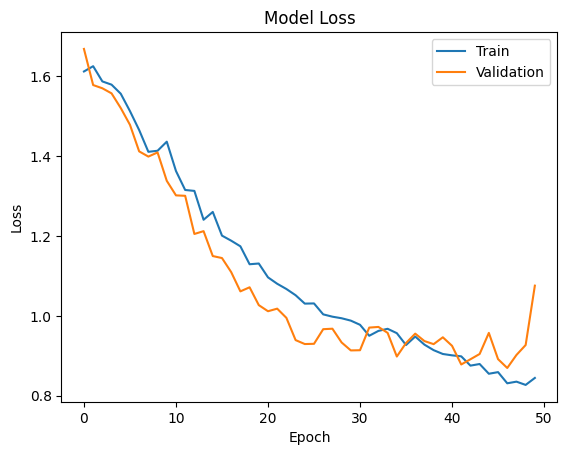

In [ ]:
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Function to see the images

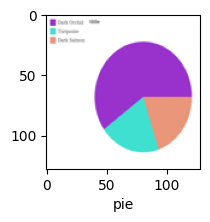

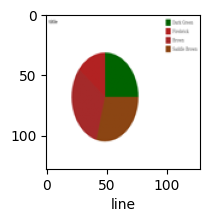

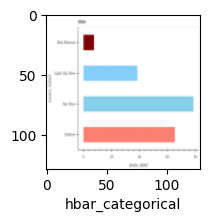

In [ ]:
def show_image_sample(x,y, index):
    plt.figure(figsize=(10, 2))
    plt.imshow(x[index])
    plt.xlabel(image_classes[y[index]])

show_image_sample(x_test,y_test,1)
show_image_sample(x_test,y_test,50)
show_image_sample(x_test,y_test,25)


TO Check predicted and actual

7/7 [==============================] - 2s 218ms/step


'vbar_categorical'

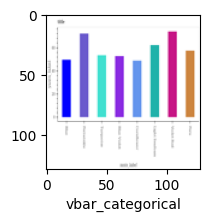

In [ ]:
y_pred = cnn_model.predict(x_test)
y_pred[:5]

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]
show_image_sample(x_test,y_test,11) #actual
image_classes[y_classes[11]] #predicted

Ploting the confusion matrix


Confusion Matrix:
[[ 0 27  0  3  7]
 [ 0 35  0  9  0]
 [ 0 12 11 25  0]
 [ 0  0  5 28  0]
 [ 0  1  0  2 35]]


Text(95.72222222222221, 0.5, 'Actual')

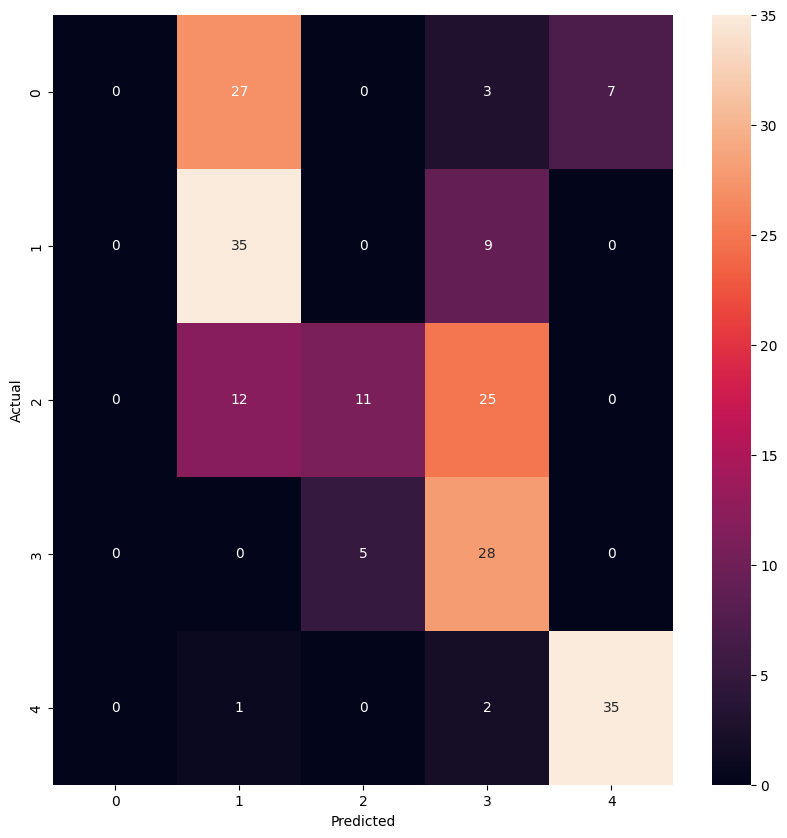

In [ ]:
 #Plot the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the directories for the train and test data
train_dir = '/content/drive/MyDrive/charts/train_val'
test_dir = '/content/drive/MyDrive/charts/test'

# Define the batch size and number of epochs
batch_size = 32
epochs = 10

# Define the image size
img_size = (299, 299)

# Use the ImageDataGenerator class to load the data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define the Xception model
base_model = tf.keras.applications.Xception(
    input_shape=img_size + (3,),
    include_top=False,
    weights='imagenet'
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, output)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Fit the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

# Print the test loss and accuracy
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
print("conf_matrix : ","\n")


# Plot the loss and accuracy curves for train and test data
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


ValueError: ignored